In [8]:
#数据分析与整理
import pandas as pd
import numpy as np
import random as rnd
# 可视化
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# 机器学习
from sklearn.linear_model import LogisticRegression    #逻辑回归
from sklearn.svm import SVC, LinearSVC                 #支持向量机
from sklearn.ensemble import RandomForestClassifier    #随机森林
from sklearn.neighbors import KNeighborsClassifier     #K最邻近算法
from sklearn.naive_bayes import GaussianNB             #朴素贝叶斯
from sklearn.linear_model import Perceptron            #感知机算法             
from sklearn.linear_model import SGDClassifier         #梯度下降分类
from sklearn.tree import DecisionTreeClassifier        #决策树算法
from sklearn.model_selection import StratifiedKFold    #K折交叉切分
from sklearn.model_selection import GridSearchCV       #网格搜索
import warnings


# 读取数据集
train_df = pd.read_csv('Titanic_dataset/train.csv')
test_df = pd.read_csv('Titanic_dataset/test.csv')

In [9]:
# 观察单个特征与生存率的关系，了解数据之间的相关性，为构造特征工程做准备。

# Pclass与Suvived的關係

# 通过表格观察客舱等级（Pclass）与生存率（Suvived)之间的关系，as_index=True会把第一列当成索引
train_df[['Pclass', 'Survived']].groupby(['Pclass'],
as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


<Figure size 576x576 with 0 Axes>

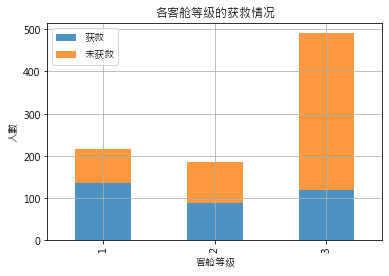

In [10]:
# 長條圖bar chart，長條間沒有連在一起，通常用來表示不連續資料
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']    # 設定字型
plt.rcParams['axes.unicode_minus']=False #用來正常顯示負號

# 檢視符合條件的數量
Survived_0 = train_df.Pclass[train_df.Survived == 0].value_counts()
Survived_1 = train_df.Pclass[train_df.Survived == 1].value_counts()
# 傳入獲救與未獲救的人數
df=pd.DataFrame({'获救':Survived_1, '未获救':Survived_0})
# 可视化柱状图
plt.figure(figsize=(8,8))
df.plot(kind='bar',stacked=True, alpha=0.8)
plt.title("各客舱等级的获救情况")
plt.xlabel("客舱等级") 
plt.ylabel("人數") 
plt.grid(True)#显示网格
plt.show()


# 結論:
# Pclass为1表示最高级车厢，也表示乘客社会阶级越高，生存率也更高

In [11]:
# Sex和Suvived

# 通过表格观察性格（Sex）与生存率（Suvived)之间的关系
train_df[["Sex", "Survived"]].groupby(['Sex'],
as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


<Figure size 576x576 with 0 Axes>

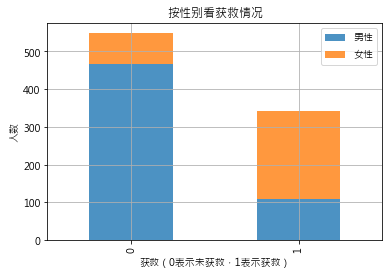

In [12]:
Survived_m = train_df.Survived[train_df.Sex == 'male'].value_counts()
Survived_f = train_df.Survived[train_df.Sex == 'female'].value_counts()
df=pd.DataFrame({'男性':Survived_m, '女性':Survived_f})
#可视化柱状图
plt.figure(figsize=(8,8))
df.plot(kind='bar',stacked=True, alpha=0.8)
plt.title("按性别看获救情况")
plt.xlabel("获救（0表示未获救，1表示获救）") 
plt.ylabel("人数") 
plt.grid(True)#显示网格
plt.show()

# 結論:
# female的生存率更高，满足电影里“女士先行，男士断后”

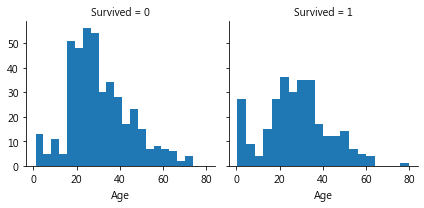

In [13]:
# 直方圖histogram，長條間有連在一起，有連續性的資料，就要用直方圖表達
# Age与suvived

# "行"為Survived
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age',bins=20)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


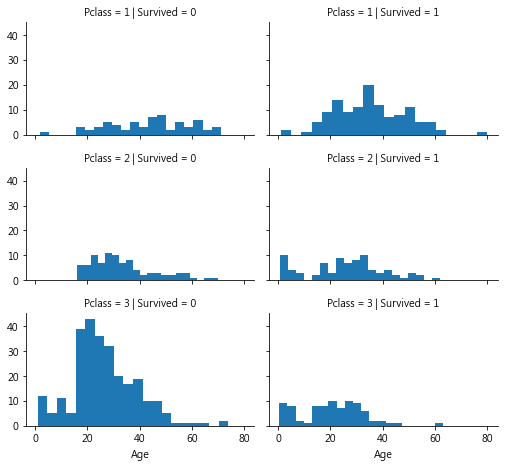

In [19]:
# 数值型与序列型特征Pclass之间的联系
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age',  bins=20)
grid.add_legend()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


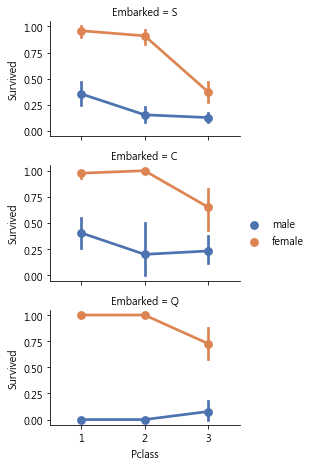

In [21]:
# 折線圖
# 离散型特征与Survived之间的联系
grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex',order=[1,2,3],hue_order=train_df.Sex.unique(),palette='deep')
grid.add_legend()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


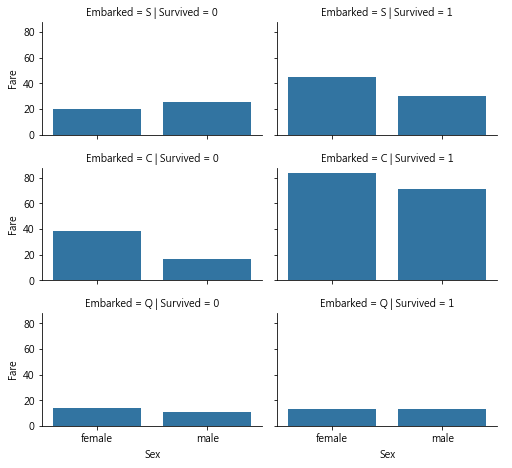

In [24]:
# 离散型特征与数值型特征之间的联系

grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', ci=None)
grid.add_legend()